In [1]:
import numpy as np
import pandas as pd
from data import (
    BODY_COMPOSITION_PREDICTORS, 
    CLINICAL_PREDICTORS, 
    CATEGORICAL_VARIABLES,
    CONTINUOUS_VARIABLES,
    DATA_CSV_PATH
)
from model import Classifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score

data = pd.read_csv(DATA_CSV_PATH).set_index('Unnamed: 0')

outcome = 'dcb'
categorical_variables = [p for p in CLINICAL_PREDICTORS if not p =='tfdr']
continuous_variables = BODY_COMPOSITION_PREDICTORS + ['tfdr']

subset = data[~data[outcome].isna()]

X = subset[continuous_variables + categorical_variables]
y = subset[outcome]
groups = subset.center

In [2]:
clinical_only = (
    categorical_variables,
    ['tfdr']
)

model = Classifier(*clinical_only)
results = cross_val_score(model, X, y, scoring='roc_auc', cv=LeaveOneGroupOut(), groups=groups)

In [4]:
results, np.mean(results)

(array([0.64100186, 0.67316017, 0.71847291, 0.646     , 0.77280702,
        0.55714005, 0.61794415, 0.60034965, 0.58333333]),
 0.6455787922934847)

In [2]:
all_variables = (
    categorical_variables,
    continuous_variables
)

clinical_and_bmi = (
    categorical_variables,
    ['BMI', 'tfdr']
)

clinical_and_body_composition = (
    categorical_variables,
    [v for v in continuous_variables if not v == 'BMI']
)

clinical_only = (
    categorical_variables,
    ['tfdr']
)

selected_features = []

for variable_set in [all_variables, clinical_and_bmi, clinical_and_body_composition, clinical_only]:
    model = Classifier(*variable_set)
    results = cross_val_score(model, X, y, scoring='roc_auc', cv=LeaveOneGroupOut(), groups=groups)
    print(results, np.mean(results))

/home/rens/miniconda3/envs/rens/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: 
All the 9 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rens/miniconda3/envs/rens/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rens/repos/body_composition/src/model.py", line 45, in fit
    selected_features.append(
NameError: name 'selected_features' is not defined


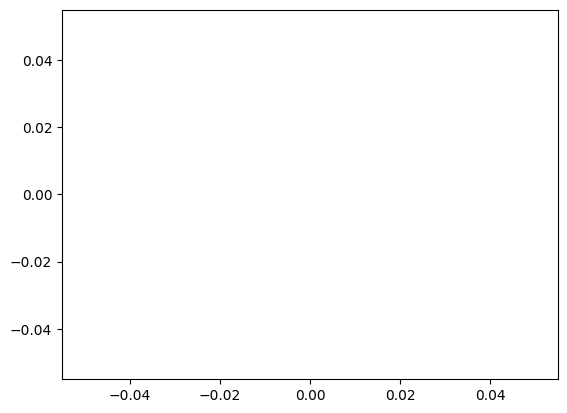

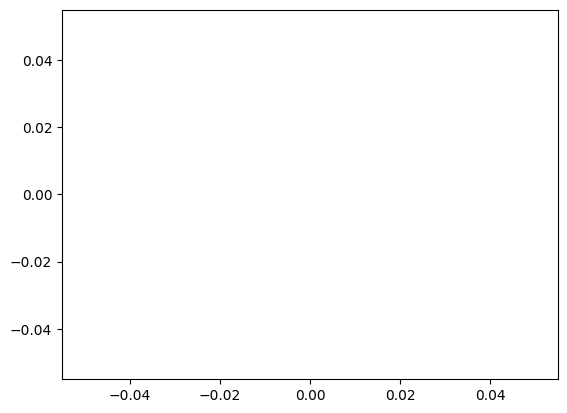

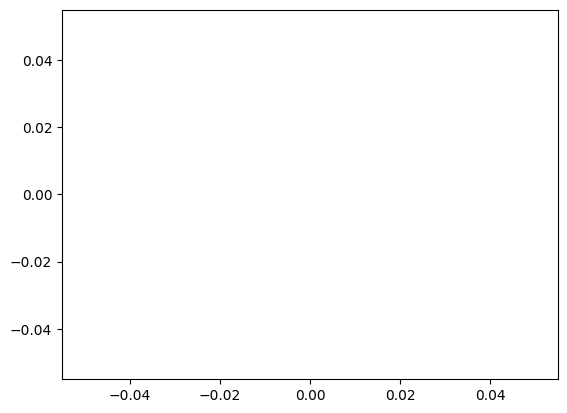

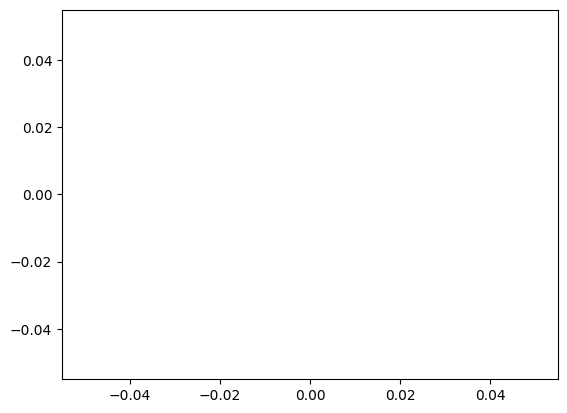

In [3]:
from collections import defaultdict
import matplotlib.pyplot as plt


for ix in range(4):
    sets = selected_features[ix*9:(ix+1)*9]
    feature_count = defaultdict(int)
    for fold in sets:
        for variable in fold:
            feature_count[variable] += 1
    count = [(var.replace('cat__', '').replace('cont__',''), count) for (var, count) in sorted(feature_count.items(), key=lambda x: x[1], reverse=True)]
    plt.barh([c[0] for c in count],[c[1] for c in count])
    plt.show()

<BarContainer object of 21 artists>

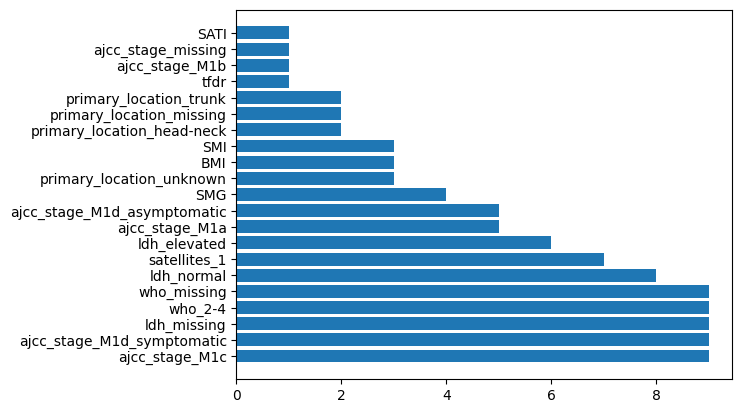

[('ajcc_stage_M1c', 9),
 ('ajcc_stage_M1d_symptomatic', 9),
 ('ldh_missing', 9),
 ('who_2-4', 9),
 ('who_missing', 9),
 ('ldh_normal', 8),
 ('satellites_1', 7),
 ('ldh_elevated', 6),
 ('ajcc_stage_M1a', 5),
 ('ajcc_stage_M1d_asymptomatic', 5),
 ('SMG', 4),
 ('primary_location_unknown', 3),
 ('BMI', 3),
 ('SMI', 3),
 ('primary_location_head-neck', 2),
 ('primary_location_missing', 2),
 ('primary_location_trunk', 2),
 ('tfdr', 1),
 ('ajcc_stage_M1b', 1),
 ('ajcc_stage_missing', 1),
 ('SATI', 1)]

In [ ]:
import seaborn as sn
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def plot_boxplots(predictor, groups, data, ax):
    _, p = mannwhitneyu(
        data[data[groups] == 0][predictor].dropna(),
        data[data[groups] == 1][predictor].dropna()
    )

    subset = data[[groups, predictor]].dropna()
    auc = roc_auc_score(subset[groups],subset[predictor])

    ax.set_title(f'{predictor} - AUC = {auc:.3f} - p = {p:.3f}')
    sn.boxenplot(data=data, x=groups, y=predictor, ax=ax)

for predictor in predictors:
    fig, ax = plt.subplots()
    plot_boxplots(predictor,'dcb',data,ax)
    fig.show()

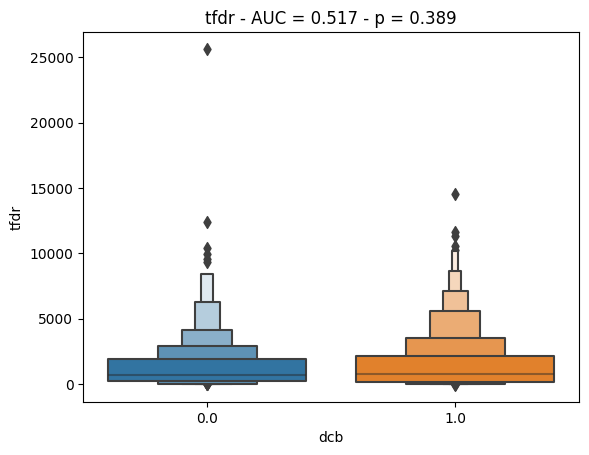

In [44]:
for predictor in ['tfdr']:
    fig, ax = plt.subplots()
    plot_boxplots(predictor,'dcb',data,ax)
    fig.show()

In [46]:
data.isna().sum()

BMI                 175
SMI                 173
SMD                   8
SMG                 179
TATI                173
SATI                173
VATI                173
dcb                 139
response            139
fu_OS               142
event_OS             89
fu_PFS              142
event_PFS            89
ajcc_stage           97
ldh                  91
primary_location    104
tfdr                 91
satellites          295
who                 128
dtype: int64